<a href="https://colab.research.google.com/github/OneMediCo/alan-ml-model/blob/main/verify_cataract_0_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_dir = '/content/drive/MyDrive/Alan/CataractData/EyeImagesTakenFromCamera2'
train_data_dir = data_dir + '/Train'
test_data_dir = data_dir + '/Test'
validation_data_dir = data_dir + '/Validation'

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
target_size = (256, 256)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=9,
    class_mode='binary')


Found 8159 images belonging to 2 classes.


In [ ]:
validation_set = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=target_size,
    batch_size=9,
    class_mode='binary')


Found 200 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=9,
    class_mode='binary')

Found 200 images belonging to 2 classes.


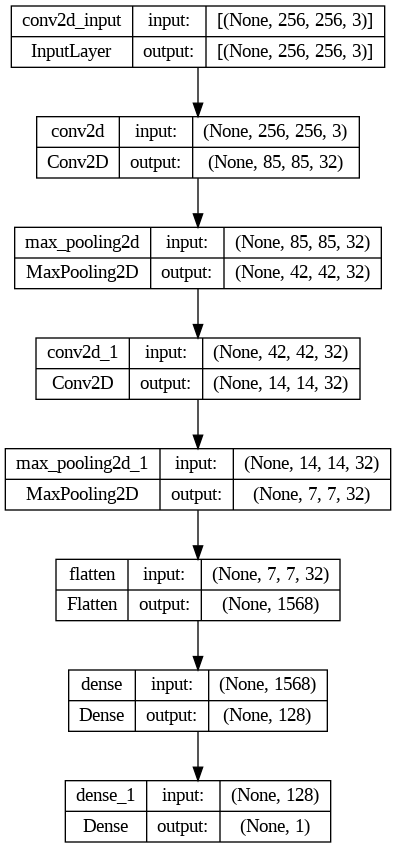

In [ ]:
model = Sequential([
    Convolution2D(32,3,3, input_shape=target_size + (3,),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Convolution2D(32,3,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128,activation='relu'),
    Dense(units=1 ,activation='sigmoid')
])
tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    training_set,
    steps_per_epoch=575,
    epochs=25,
    validation_data=validation_set
)

Epoch 1/25
575/575 [==============================] - 209s 359ms/step - loss: 0.4974 - accuracy: 0.7442 - val_loss: 0.3778 - val_accuracy: 0.8300
Epoch 2/25
575/575 [==============================] - 176s 306ms/step - loss: 0.3342 - accuracy: 0.8581 - val_loss: 0.3076 - val_accuracy: 0.8800
Epoch 3/25
575/575 [==============================] - 165s 287ms/step - loss: 0.2740 - accuracy: 0.8845 - val_loss: 0.2656 - val_accuracy: 0.8700
Epoch 4/25
575/575 [==============================] - 160s 276ms/step - loss: 0.2223 - accuracy: 0.9097 - val_loss: 0.1933 - val_accuracy: 0.9450
Epoch 5/25
575/575 [==============================] - 161s 280ms/step - loss: 0.1903 - accuracy: 0.9256 - val_loss: 0.1735 - val_accuracy: 0.9250
Epoch 6/25
575/575 [==============================] - 159s 276ms/step - loss: 0.1813 - accuracy: 0.9310 - val_loss: 0.1881 - val_accuracy: 0.9300
Epoch 7/25
575/575 [==============================] - 160s 279ms/step - loss: 0.1711 - accuracy: 0.9300 - val_loss: 0.2996 -

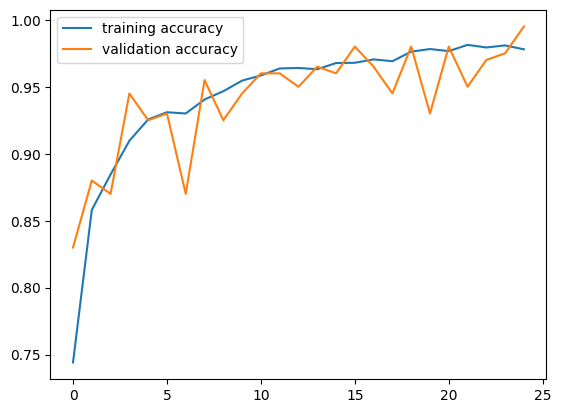

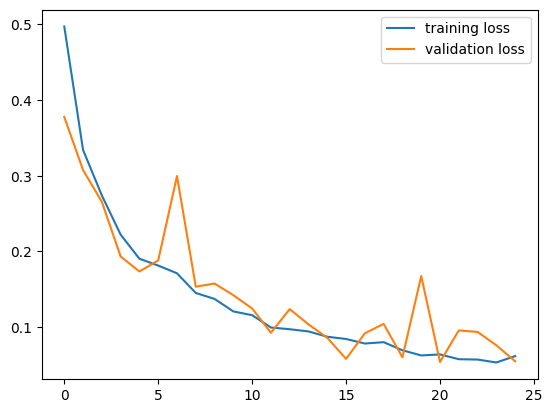

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["accuracy"], label="training accuracy")
plt.plot(model.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

plt.plot(model.history.history["loss"], label="training loss")
plt.plot(model.history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [ ]:
import datetime
import os

MODEL_DIR = '/content/drive/MyDrive/Alan/Model'
version = int(datetime.datetime.now().timestamp())
export_path = os.path.join(MODEL_DIR, 'verify-cataract-0.11-'+str(version))
print('export_path = {}\n'.format(export_path))

tensorflow.keras.models.save_model(
    model,
    export_path
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /content/drive/MyDrive/Alan/Model/verify-cataract-0.11-1687482936




Saved model:
total 171
drwx------ 2 root root   4096 Jun 23 01:15 assets
-rw------- 1 root root     57 Jun 23 01:15 fingerprint.pb
-rw------- 1 root root  16091 Jun 23 01:15 keras_metadata.pb
-rw------- 1 root root 149218 Jun 23 01:15 saved_model.pb
drwx------ 2 root root   4096 Jun 23 01:15 variables


In [ ]:
t1_image = '/content/drive/MyDrive/Alan/CataractData/EyeImagesTakenFromCamera/test/cataract/image_247.png'
img = tensorflow.keras.utils.load_img(
    t1_image,target_size=target_size
)
img_array = tensorflow.keras.utils.img_to_array(img)
img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
# print(np.argmax(predictions, axis=-1))
# print(train_ds_class_names)
print(t1_image, 'is', 'normal' if predictions[0][0] == 1 else 'cataract')

1/1 [==============================] - 0s 168ms/step
[[0.]]
/content/drive/MyDrive/Alan/CataractData/EyeImagesTakenFromCamera/test/cataract/image_247.png is cataract


In [ ]:
def predict_cataract_or_not(image_path, target_size=(128,128)):
  img = tensorflow.keras.utils.load_img(
      image_path, target_size=target_size
  )
  img_array = tensorflow.keras.utils.img_to_array(img)
  img_array = tensorflow.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  return 'normal' if predictions[0][0] == 1 else 'cataract'


In [ ]:
predictions = {image_path: predict_cataract_or_not(image_path, target_size=target_size) for image_path in test_set.filepaths}

1/1 [==============================] - 0s 34ms/step


In [ ]:
matching = 0
normal_matching = 0
cataract_matching = 0
for image_path, prediction in predictions.items():
  if (image_path.startswith('/content/drive/MyDrive/Alan/CataractData/EyeImagesTakenFromCamera2/Test/Normal') and prediction == 'normal'):
    normal_matching += 1
  if (image_path.startswith('/content/drive/MyDrive/Alan/CataractData/EyeImagesTakenFromCamera2/Test/Cataract') and prediction == 'cataract'):
    cataract_matching += 1

matching = normal_matching + cataract_matching
print('------------ Overall ---------------')
print(matching, 'out of', len(predictions))
print(matching/len(predictions))
print('---------------- Normal --------------')
print(normal_matching, 'out of', int(len(predictions)/2))
print(normal_matching/(len(predictions)/2))
print('---------------- Cataract --------------')
print(cataract_matching, 'out of', int(len(predictions)/2))
print(cataract_matching/(len(predictions)/2))


------------ Overall ---------------
139 out of 200
0.695
---------------- Normal --------------
60 out of 100
0.6
---------------- Cataract --------------
79 out of 100
0.79
